## Business Objective

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.


- After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around  10 million dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


- As a data analyst, we need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

__author__ = 'Sri Harsha Ravi'

In [1]:
#importing python libraries
import pandas as pd
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Data Set
countries_df = pd.read_csv('C:\\Users\\sravi35\\OneDrive\\Personal\\IIITB\\PredictiveAnalytics1\\Module6\\M6S1\\Country-data.csv')

# Data understanding and EDA

In [3]:
#Inspecting the number of rows and columns
countries_df.shape

(167, 10)

In [4]:
#checking top 5 rows data
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#checking for the datatypes and empty rows for each column/variable
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


##### Seems like there are no blank rows and all the data types look to be as expected

In [6]:
#checking for null values
countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### There are no null values in the entire dataset

In [7]:
#checking for duplicated rows
countries_df.drop_duplicates(inplace=True)
countries_df.shape

(167, 10)

##### No duplicate rows

In [8]:
#check the mean, quartile values
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


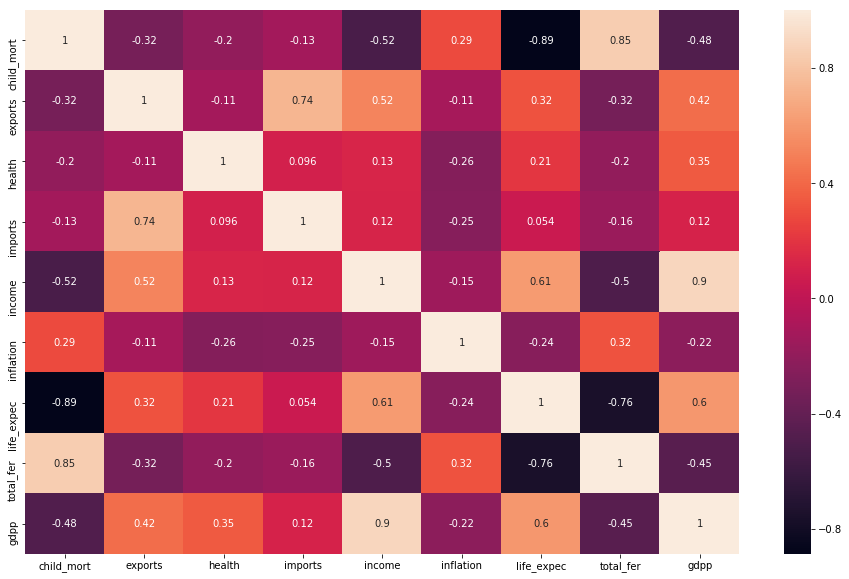

In [9]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(countries_df.corr(),annot = True)

#### Preparing the dataframe on which pca could be applied

In [10]:
#Dropping Country variable as it is Categorical
PCA_countries_df = countries_df.drop('country', axis=1)

In [11]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(PCA_countries_df.transpose())

In [12]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [13]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.895571433087532 , min corr:  -0.8866760973367759


##### Variables seem to be highly correlated and hence justified to perform PCA

# Model building and evaluation 

In [14]:
#Dropping Country variable as it is Categorical
PCA_countries_df = countries_df.drop('country', axis=1)

In [15]:
#Checking the shape and columns of PCA_countries_df
print(PCA_countries_df.shape)
print(PCA_countries_df.columns)

(167, 9)
Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


#### Scaling the Variables

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(PCA_countries_df)
PCA_countries_df_scaled = scaler.transform(PCA_countries_df) 

In [17]:
PCA_countries_df_scaled.shape

(167, 9)

#### Performing PCA for dimensional reduction

In [18]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [19]:
#performing the PCA on the PCA_countries_df
pca.fit(PCA_countries_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [21]:
pca_85_info = PCA(0.85)
pca_85_info_scaled = pca_85_info.fit_transform(PCA_countries_df_scaled)
pca_85_info_scaled.shape

(167, 4)

#### Choosing 4 variables as it doesn't make sense to retain more 50% of original variables

#### Scree-Plot

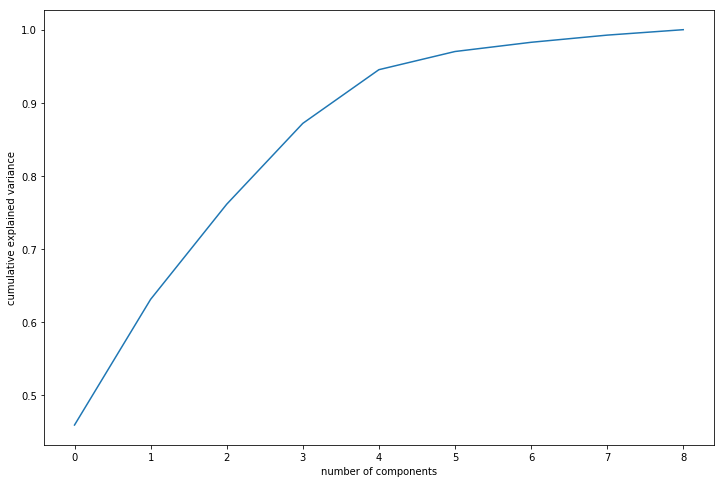

In [22]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
from sklearn.decomposition import IncrementalPCA
pca_4_comp = PCA(n_components=4)

##### Not using incremental PCA as the dataset is small in size

In [24]:
pca_4_comp

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Basis transformation - getting the data onto our PCs

In [25]:
transformed_pca = pca_4_comp.fit_transform(PCA_countries_df_scaled)
transformed_pca.shape

(167, 4)

##### Creating correlation matrix for the principal components - we expect little to no correlation


In [26]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(transformed_pca.transpose())

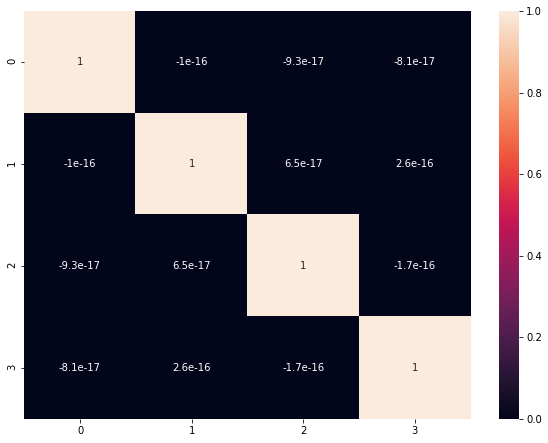

In [27]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,7.5))
sns.heatmap(corrmat,annot = True)

In [28]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 2.6231034152768506e-16 , min corr:  -1.6526831488035391e-16


#### Purpose of using PCA is solved as it has reduced the dimensions as well as the correlation is almost zero

In [29]:
transformed_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01,
         5.56335553e-02],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01,
      

In [30]:
transformed_pca_df = pd.DataFrame(transformed_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
transformed_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [31]:
transformed_pca_df.shape

(167, 4)

#### Treating the Outliers

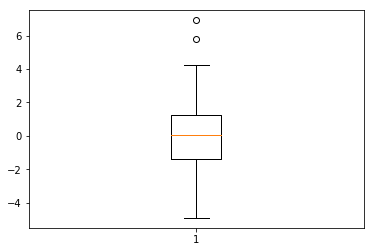

In [32]:
# Outlier Analysis
plt.boxplot(transformed_pca_df.PC1)
Q1 = transformed_pca_df.PC1.quantile(0.25)
Q3 = transformed_pca_df.PC1.quantile(0.75)
IQR = Q3 - Q1
transformed_pca_df = transformed_pca_df[(transformed_pca_df.PC1 >= Q1 - 1.5*IQR) & \
                                          (transformed_pca_df.PC1 <= Q3 + 1.5*IQR)]

In [33]:
transformed_pca_df.shape

(165, 4)

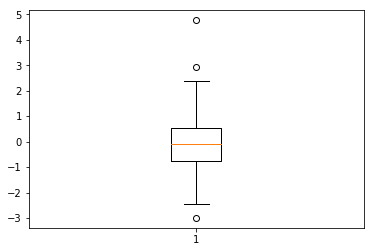

In [34]:
plt.boxplot(transformed_pca_df.PC2)
Q1 = transformed_pca_df.PC2.quantile(0.25)
Q3 = transformed_pca_df.PC2.quantile(0.75)
IQR = Q3 - Q1
transformed_pca_df = transformed_pca_df[(transformed_pca_df.PC2 >= Q1 - 1.5*IQR) & \
                                          (transformed_pca_df.PC2 <= Q3 + 1.5*IQR)]

In [35]:
transformed_pca_df.shape

(162, 4)

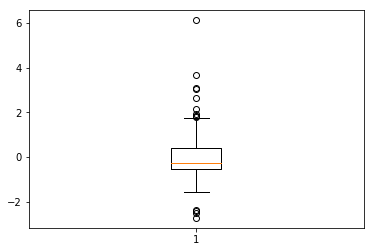

In [36]:
plt.boxplot(transformed_pca_df.PC3)
Q1 = transformed_pca_df.PC3.quantile(0.25)
Q3 = transformed_pca_df.PC3.quantile(0.75)
IQR = Q3 - Q1
transformed_pca_df = transformed_pca_df[(transformed_pca_df.PC3 >= Q1 - 1.5*IQR) & \
                                          (transformed_pca_df.PC3 <= Q3 + 1.5*IQR)]

In [37]:
transformed_pca_df.shape

(148, 4)

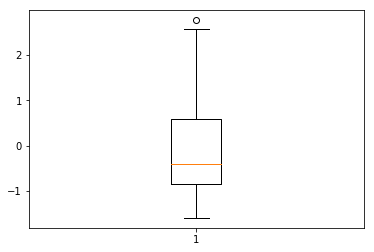

In [38]:
plt.boxplot(transformed_pca_df.PC4)
Q1 = transformed_pca_df.PC4.quantile(0.25)
Q3 = transformed_pca_df.PC4.quantile(0.75)
IQR = Q3 - Q1
transformed_pca_df = transformed_pca_df[(transformed_pca_df.PC4 >= Q1 - 1.5*IQR) & \
                                          (transformed_pca_df.PC4 <= Q3 + 1.5*IQR)]

In [39]:
transformed_pca_df.shape

(147, 4)

In [40]:
transformed_pca_df.shape

(167, 4)

# Scatter Plot between PC1 and PC2

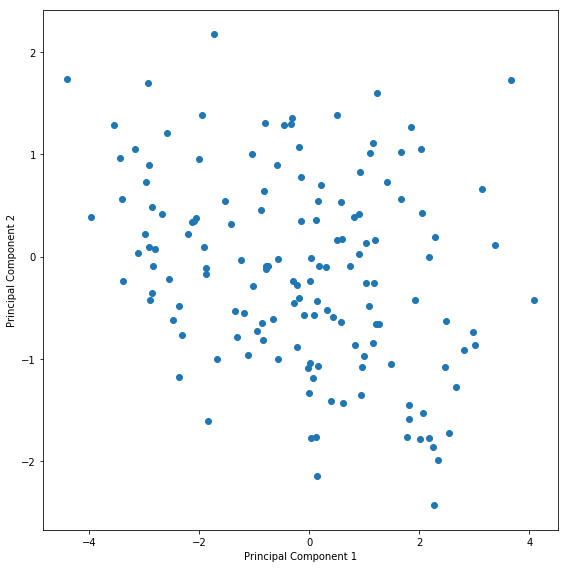

In [41]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(transformed_pca_df['PC1'], transformed_pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Can K-Means be applied?
### Performing Hopkins Measure to confirm

In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
hopkins(transformed_pca_df)

0.7317953789585521

#### Accordingly, we are good to perform K-Means clustering

### Silhouette Analysis - To determine the value of K

In [44]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(transformed_pca_df)
    sse_.append([k, silhouette_score(transformed_pca_df, kmeans.labels_)])

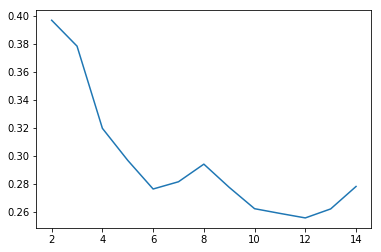

In [45]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

### Sum of Squared Distances

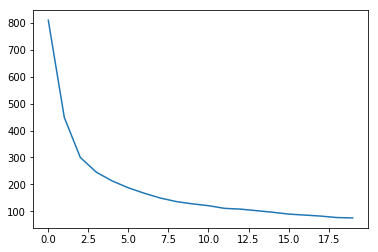

In [46]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(transformed_pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

#### K = 4 looks to be a sensible option to pick

## K-Means Clustering with k=4

In [47]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(transformed_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
model_clus4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
transformed_pca_df.shape

(147, 4)

In [50]:
transformed_pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [51]:
index_df = pd.DataFrame(transformed_pca_df.index)
dummy_df = pd.concat([index_df, pd.Series(model_clus4.labels_)], axis=1)
dummy_df.columns = ['index_num', 'Cluster_ID'] 
dummy_df.head()

,index_num,Cluster_ID
0,0,0
1,1,3
2,2,2
3,3,0
4,4,3


In [52]:
dummy_df.set_index('index_num', inplace=True)
dummy_df.head()

,Cluster_ID
index_num,
0,0
1,3
2,2
3,0
4,3


In [53]:
# analysis of clusters formed
#transformed_pca_df.index = pd.RangeIndex(len(transformed_pca_df.index))
transformed_pca_df_km = pd.merge(transformed_pca_df, dummy_df, how='inner', left_index=True, right_index=True)
transformed_pca_df_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
transformed_pca_df_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913025,0.095621,-0.718118,1.005255,0
1,0.429911,-0.588156,-0.333486,-1.161059,3
2,-0.285225,-0.455174,1.221505,-0.868115,2
3,-2.932423,1.695555,1.525044,0.839625,0
4,1.033576,0.136659,-0.225721,-0.847063,3


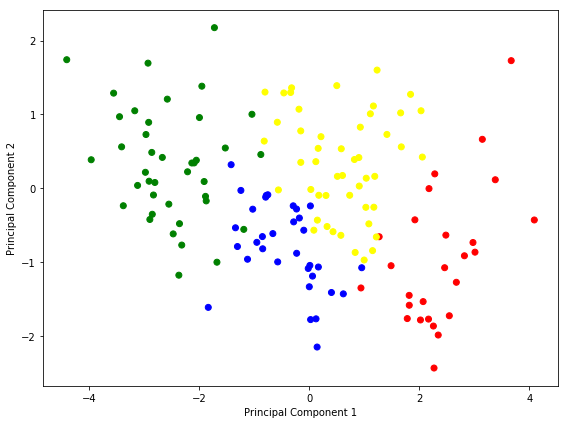

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (8, 6))
plt.scatter(transformed_pca_df_km['PC1'], transformed_pca_df_km['PC2'],c = transformed_pca_df_km.ClusterID.map({0:'green',1:'red', 2:'blue', 3:'yellow'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Countries towards the extreme left would be in need of the Aid

### Joining back the clustered data with countries df

In [55]:
Clustered_countries_df = pd.merge(countries_df, dummy_df, how='inner', left_index=True, right_index=True)

In [56]:
#Clustered_countries_df.columns
grouped_cluster = Clustered_countries_df.groupby('Cluster_ID').mean()
grouped_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_ID,,,,,,,,,
0,94.397500,27.252750,6.115000,39.660000,2838.325000,9.792125,59.057500,5.088250,1367.125000
1,4.738462,42.953846,9.828077,41.565385,36280.769231,1.303577,80.557692,1.760385,39265.384615
2,29.927273,26.690576,5.475152,29.365633,10476.969697,10.549879,72.118182,2.570303,5101.090909
3,17.185417,50.679167,6.665625,59.314583,13251.666667,4.299125,73.120833,2.132708,7130.541667


In [57]:
Clustered_countries_df[Clustered_countries_df.Cluster_ID == 1].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1


In [58]:
Clustered_countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster_ID'],
      dtype='object')

In [59]:
km_clusters_child_mort = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).gdpp.mean())

In [60]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports,\
               km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp ], axis=1)
df.columns = ["ClusterID", "child_mort", 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',\
             'gdpp']
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,94.397500,27.252750,6.115000,39.660000,2838.325000,9.792125,59.057500,5.088250,1367.125000
1,1,4.738462,42.953846,9.828077,41.565385,36280.769231,1.303577,80.557692,1.760385,39265.384615
2,2,29.927273,26.690576,5.475152,29.365633,10476.969697,10.549879,72.118182,2.570303,5101.090909
3,3,17.185417,50.679167,6.665625,59.314583,13251.666667,4.299125,73.120833,2.132708,7130.541667


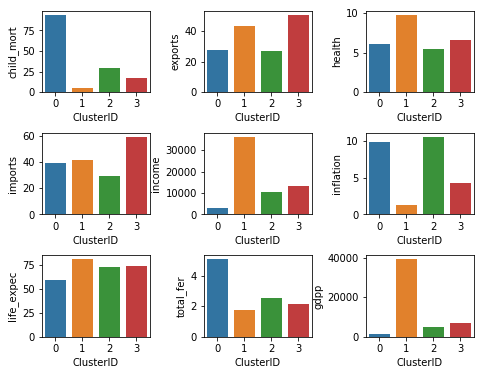

In [61]:
f = plt.figure(figsize=(6,6))
plt.subplot(331)  
plt.subplots_adjust(right=0.2, wspace = 0.5, hspace=0.5)
sns.barplot(x=df.ClusterID, y=df.child_mort)
plt.subplot(332)
plt.subplots_adjust(left = 0.2, right=2)
sns.barplot(x=df.ClusterID, y=df.exports)
plt.subplot(333)
plt.subplots_adjust(right=2)
sns.barplot(x=df.ClusterID, y=df.health)
plt.subplot(334)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.imports)
plt.subplot(335)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.income)
plt.subplot(336)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.inflation)
plt.subplot(337)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.life_expec)
plt.subplot(338)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.total_fer)
plt.subplot(339)
plt.subplots_adjust(right=1.2)
sns.barplot(x=df.ClusterID, y=df.gdpp)

##### The above graphs suggest that the Countries under there is a cluster with low gdpp, high child_mort, high inflation and the countries belonging to that cluster should be taken care and the same need to be confirmed by running with different k
#### Note: The Cluster numbers can change after each run. However, the countries within each cluster would remain same for a particular k value

## Performing k-means cluster for k=6 as there is further steep dip after 6 

In [62]:
# Kmeans with K=6
model_clus6 = KMeans(n_clusters = 6, max_iter=50)
model_clus6.fit(transformed_pca_df)
model_clus6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
print(transformed_pca_df.shape)

index_df = pd.DataFrame(transformed_pca_df.index)
dummy_df = pd.concat([index_df, pd.Series(model_clus6.labels_)], axis=1)
dummy_df.columns = ['index_num', 'Cluster_ID'] 
dummy_df.head()

(147, 4)


,index_num,Cluster_ID
0,0,2
1,1,5
2,2,5
3,3,2
4,4,1


In [64]:
dummy_df.set_index('index_num', inplace=True)
dummy_df.head()

# analysis of clusters formed
#transformed_pca_df.index = pd.RangeIndex(len(transformed_pca_df.index))
transformed_pca_df_km = pd.merge(transformed_pca_df, dummy_df, how='inner', left_index=True, right_index=True)
transformed_pca_df_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
transformed_pca_df_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913025,0.095621,-0.718118,1.005255,2
1,0.429911,-0.588156,-0.333486,-1.161059,5
2,-0.285225,-0.455174,1.221505,-0.868115,5
3,-2.932423,1.695555,1.525044,0.839625,2
4,1.033576,0.136659,-0.225721,-0.847063,1


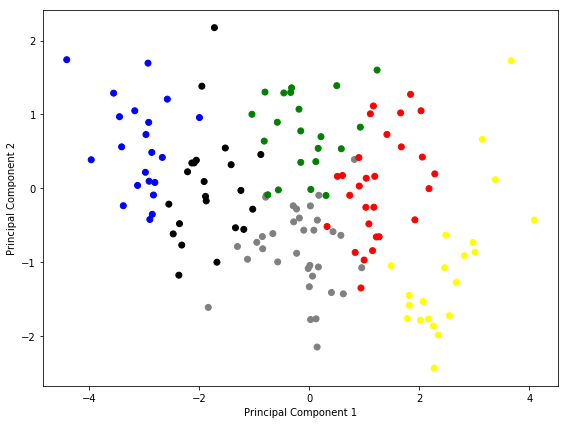

In [65]:
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(transformed_pca_df_km['PC1'], transformed_pca_df_km['PC2'],c = transformed_pca_df_km.\
            ClusterID.map({0:'green',1:'red', 2:'blue', 3:'yellow', 4:'black', 5:'grey'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### Countries towards the extreme left would be in need of the Aid

In [66]:
Clustered_countries_df = pd.merge(countries_df, dummy_df, how='inner', left_index=True, right_index=True)

In [67]:
#Clustered_countries_df.columns
grouped_cluster = Clustered_countries_df.groupby('Cluster_ID').mean()
grouped_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_ID,,,,,,,,,
0,26.880952,50.671429,5.620476,63.423810,7710.952381,5.825476,69.547619,2.786667,3651.238095
1,9.503571,51.121429,7.824286,57.778571,18802.142857,2.466893,76.060714,1.667143,12276.785714
2,117.176190,26.553333,6.554762,40.161905,1726.809524,8.690238,55.376190,5.640000,789.857143
3,4.204762,42.128571,10.210952,39.780952,38780.952381,1.120619,80.990476,1.798571,43257.142857
4,66.863636,28.149545,5.550455,37.318182,4701.363636,11.832273,63.940909,4.374545,2193.000000
5,25.323529,28.329088,5.572353,30.404879,11652.058824,9.480471,73.114706,2.318824,5662.588235


In [68]:
Clustered_countries_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster_ID'],
      dtype='object')

In [69]:
km_clusters_child_mort = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(Clustered_countries_df.groupby(["Cluster_ID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4,5]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports,\
               km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp ], axis=1)

In [70]:
df.columns = ["ClusterID", "child_mort", 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',\
             'gdpp']
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,26.880952,50.671429,5.620476,63.423810,7710.952381,5.825476,69.547619,2.786667,3651.238095
1,1,9.503571,51.121429,7.824286,57.778571,18802.142857,2.466893,76.060714,1.667143,12276.785714
2,2,117.176190,26.553333,6.554762,40.161905,1726.809524,8.690238,55.376190,5.640000,789.857143
3,3,4.204762,42.128571,10.210952,39.780952,38780.952381,1.120619,80.990476,1.798571,43257.142857
4,4,66.863636,28.149545,5.550455,37.318182,4701.363636,11.832273,63.940909,4.374545,2193.000000
5,5,25.323529,28.329088,5.572353,30.404879,11652.058824,9.480471,73.114706,2.318824,5662.588235


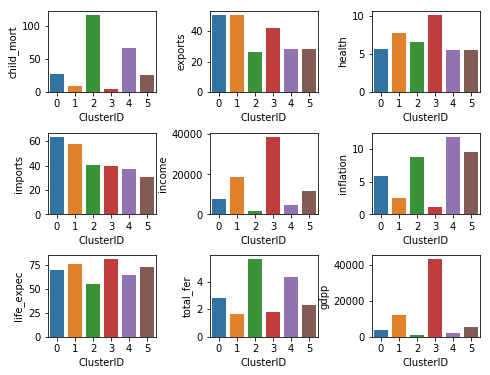

In [71]:
f = plt.figure(figsize=(6,6))
plt.subplot(331)  
plt.subplots_adjust(right=0.2, wspace = 0.5, hspace=0.5)
sns.barplot(x=df.ClusterID, y=df.child_mort)
plt.subplot(332)
plt.subplots_adjust(left = 0.2, right=2)
sns.barplot(x=df.ClusterID, y=df.exports)
plt.subplot(333)
plt.subplots_adjust(right=2)
sns.barplot(x=df.ClusterID, y=df.health)
plt.subplot(334)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.imports)
plt.subplot(335)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.income)
plt.subplot(336)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.inflation)
plt.subplot(337)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.life_expec)
plt.subplot(338)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.total_fer)
plt.subplot(339)
plt.subplots_adjust(right=1.2)
sns.barplot(x=df.ClusterID, y=df.gdpp)

# Hierarchial Clustering

In [72]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

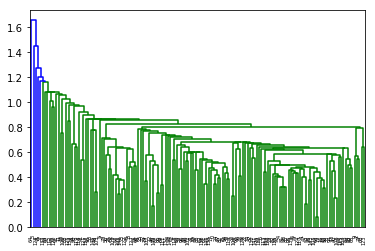

In [73]:
# heirarchical clustering
mergings = linkage(transformed_pca_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

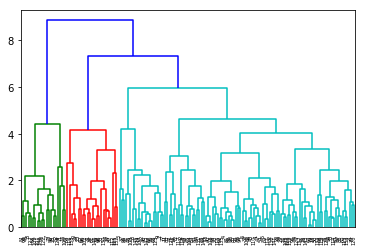

In [74]:
mergings = linkage(transformed_pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [75]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
clusterCut.head()

0    0
1    1
2    2
3    2
4    1
dtype: int32

In [76]:
index_df = pd.DataFrame(transformed_pca_df.index)
dummy_df = pd.concat([index_df, clusterCut], axis=1)
dummy_df.columns = ['index_num', 'Cluster_ID'] 
dummy_df.head()


dummy_df.set_index('index_num', inplace=True)
dummy_df.head()

,Cluster_ID
index_num,
0,0
1,1
2,2
3,2
4,1


In [77]:
Clustered_countries_df_hc = pd.merge(countries_df, dummy_df, how='inner', left_index=True, right_index=True)
Clustered_countries_df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [78]:
#Clustered_countries_df.columns
grouped_cluster_hc = Clustered_countries_df_hc.groupby('Cluster_ID').mean()
grouped_cluster_hc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_ID,,,,,,,,,
0,109.834783,22.074783,6.917391,36.839130,1644.043478,9.429348,56.756522,5.585217,822.347826
1,24.501190,41.675000,6.642857,50.429762,12766.547619,5.373619,72.210714,2.453095,7539.916667
2,52.180000,33.108950,3.843000,29.868295,7182.500000,14.503000,67.800000,3.361500,2806.000000
3,4.185000,42.485000,10.340000,40.125000,39240.000000,1.088150,80.970000,1.737000,43890.000000


In [79]:
Clustered_countries_df_hc.to_csv('C:\\Users\\sravi35\\OneDrive\\Personal\\IIITB\\PredictiveAnalytics1\\Module6\\M6S1\\Final_csv\\Final_HC_4.csv')

In [80]:
hc_clusters_child_mort = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health, hc_clusters_imports,\
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec, hc_clusters_total_fer, hc_clusters_gdpp ], axis=1)

df.columns = ["ClusterID", "child_mort", 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',\
             'gdpp']
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,109.834783,22.074783,6.917391,36.839130,1644.043478,9.429348,56.756522,5.585217,822.347826
1,1,24.501190,41.675000,6.642857,50.429762,12766.547619,5.373619,72.210714,2.453095,7539.916667
2,2,52.180000,33.108950,3.843000,29.868295,7182.500000,14.503000,67.800000,3.361500,2806.000000
3,3,4.185000,42.485000,10.340000,40.125000,39240.000000,1.088150,80.970000,1.737000,43890.000000


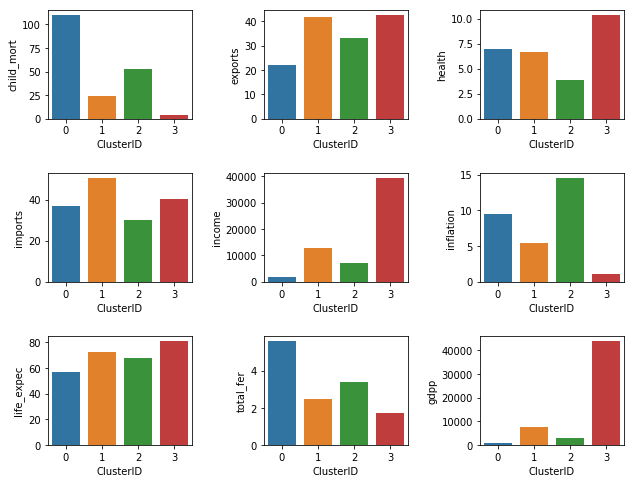

In [81]:
f = plt.figure(figsize=(8,8))
plt.subplot(331)  
plt.subplots_adjust(right=0.2, wspace = 0.5, hspace=0.5)
sns.barplot(x=df.ClusterID, y=df.child_mort)
plt.subplot(332)
plt.subplots_adjust(left = 0.2, right=2)
sns.barplot(x=df.ClusterID, y=df.exports)
plt.subplot(333)
plt.subplots_adjust(right=2)
sns.barplot(x=df.ClusterID, y=df.health)
plt.subplot(334)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.imports)
plt.subplot(335)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.income)
plt.subplot(336)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.inflation)
plt.subplot(337)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.life_expec)
plt.subplot(338)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.total_fer)
plt.subplot(339)
plt.subplots_adjust(right=1.2)
sns.barplot(x=df.ClusterID, y=df.gdpp)

In [82]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 6).reshape(-1,))
clusterCut.head()

0    0
1    1
2    2
3    2
4    1
dtype: int32

In [83]:
index_df = pd.DataFrame(transformed_pca_df.index)
dummy_df = pd.concat([index_df, clusterCut], axis=1)
dummy_df.columns = ['index_num', 'Cluster_ID'] 
dummy_df.head()


dummy_df.set_index('index_num', inplace=True)
dummy_df.head()

,Cluster_ID
index_num,
0,0
1,1
2,2
3,2
4,1


In [84]:
Clustered_countries_df_hc = pd.merge(countries_df, dummy_df, how='inner', left_index=True, right_index=True)
Clustered_countries_df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [85]:
#Clustered_countries_df.columns
grouped_cluster_hc = Clustered_countries_df_hc.groupby('Cluster_ID').mean()
grouped_cluster_hc

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_ID,,,,,,,,,
0,109.834783,22.074783,6.917391,36.839130,1644.043478,9.429348,56.756522,5.585217,822.347826
1,28.668182,35.496970,6.653030,47.374242,9930.303030,5.676652,71.089394,2.620909,5346.712121
2,52.180000,33.108950,3.843000,29.868295,7182.500000,14.503000,67.800000,3.361500,2806.000000
3,4.125000,33.393750,10.219375,32.775000,37312.500000,1.371125,81.006250,1.720000,41237.500000
4,9.222222,64.327778,6.605556,61.633333,23166.111111,4.262500,76.322222,1.837778,15581.666667
5,4.425000,78.850000,10.822500,69.525000,46950.000000,-0.043750,80.825000,1.805000,54500.000000


In [86]:
hc_clusters_child_mort = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(Clustered_countries_df_hc.groupby(["Cluster_ID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4,5]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health, hc_clusters_imports,\
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec, hc_clusters_total_fer, hc_clusters_gdpp ], axis=1)

df.columns = ["ClusterID", "child_mort", 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer',\
             'gdpp']
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,109.834783,22.074783,6.917391,36.839130,1644.043478,9.429348,56.756522,5.585217,822.347826
1,1,28.668182,35.496970,6.653030,47.374242,9930.303030,5.676652,71.089394,2.620909,5346.712121
2,2,52.180000,33.108950,3.843000,29.868295,7182.500000,14.503000,67.800000,3.361500,2806.000000
3,3,4.125000,33.393750,10.219375,32.775000,37312.500000,1.371125,81.006250,1.720000,41237.500000
4,4,9.222222,64.327778,6.605556,61.633333,23166.111111,4.262500,76.322222,1.837778,15581.666667
5,5,4.425000,78.850000,10.822500,69.525000,46950.000000,-0.043750,80.825000,1.805000,54500.000000


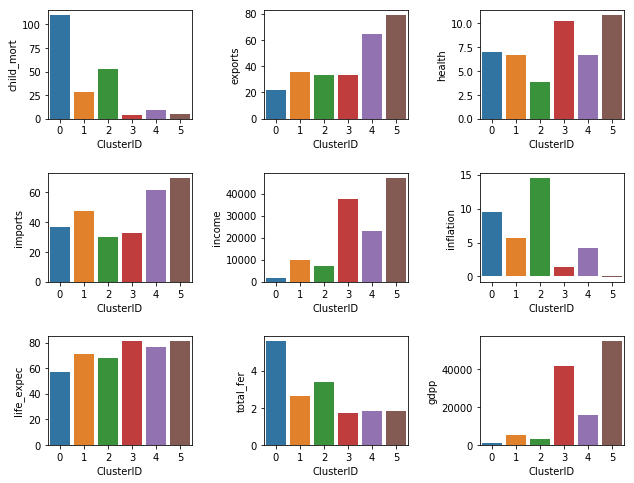

In [87]:
f = plt.figure(figsize=(8,8))
plt.subplot(331)  
plt.subplots_adjust(right=0.2, wspace = 0.5, hspace=0.5)
sns.barplot(x=df.ClusterID, y=df.child_mort)
plt.subplot(332)
plt.subplots_adjust(left = 0.2, right=2)
sns.barplot(x=df.ClusterID, y=df.exports)
plt.subplot(333)
plt.subplots_adjust(right=2)
sns.barplot(x=df.ClusterID, y=df.health)
plt.subplot(334)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.imports)
plt.subplot(335)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.income)
plt.subplot(336)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.inflation)
plt.subplot(337)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.life_expec)
plt.subplot(338)
plt.subplots_adjust(right=1.5)
sns.barplot(x=df.ClusterID, y=df.total_fer)
plt.subplot(339)
plt.subplots_adjust(right=1.2)
sns.barplot(x=df.ClusterID, y=df.gdpp)

# Outliers

In [88]:
to_concat_df = Clustered_countries_df.drop('Cluster_ID', axis=1)

In [89]:
pd.concat([countries_df, to_concat_df]).drop_duplicates(keep=False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.520,60.7,3.84,1490
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.150,46.5,3.30,1170
88,Liberia,89.3,19.1,11.80,92.6,700,5.470,60.8,5.02,327
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
101,"Micronesia, Fed. Sts.",40.0,23.5,14.20,81.0,3340,3.800,65.4,3.46,2860
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650


# Above Countries are part of the Outliers

**After looking at the above removed outliers the following countries are closely matching with the Countries present in the
Cluster which is in need of an Aid**

-  Kiribati
-  Lesotho
-  Liberia
-  Nigeria

### Consolidated list of countries after analyzing the Clusters with different k values of K-Means and Cut value of Hierarchial Clustering and also the Outlier data below 28 Countries would be needing major assistance from the NGO

-  Afghanistan
-  Benin
-  Burkina Faso
-  Burundi
-  Cameroon
-  Central African Republic
-  Chad
-  Congo, Dem. Rep.
-  Cote d'Ivoire
-  Guinea
-  Guinea-Bissau
-  Haiti
-  Malawi
-  Mali
-  Mozambique
-  Niger
-  Rwanda
-  Sierra Leone
-  Sudan
-  Tanzania
-  Timor-Leste
-  Togo
-  Uganda
-  Zambia
-  Kiribati
-  Lesotho
-  Liberia
-  Nigeria

##### Few other Countries might also need the assistance but not as needy as the above set of Countries